/home/theoden/.local/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


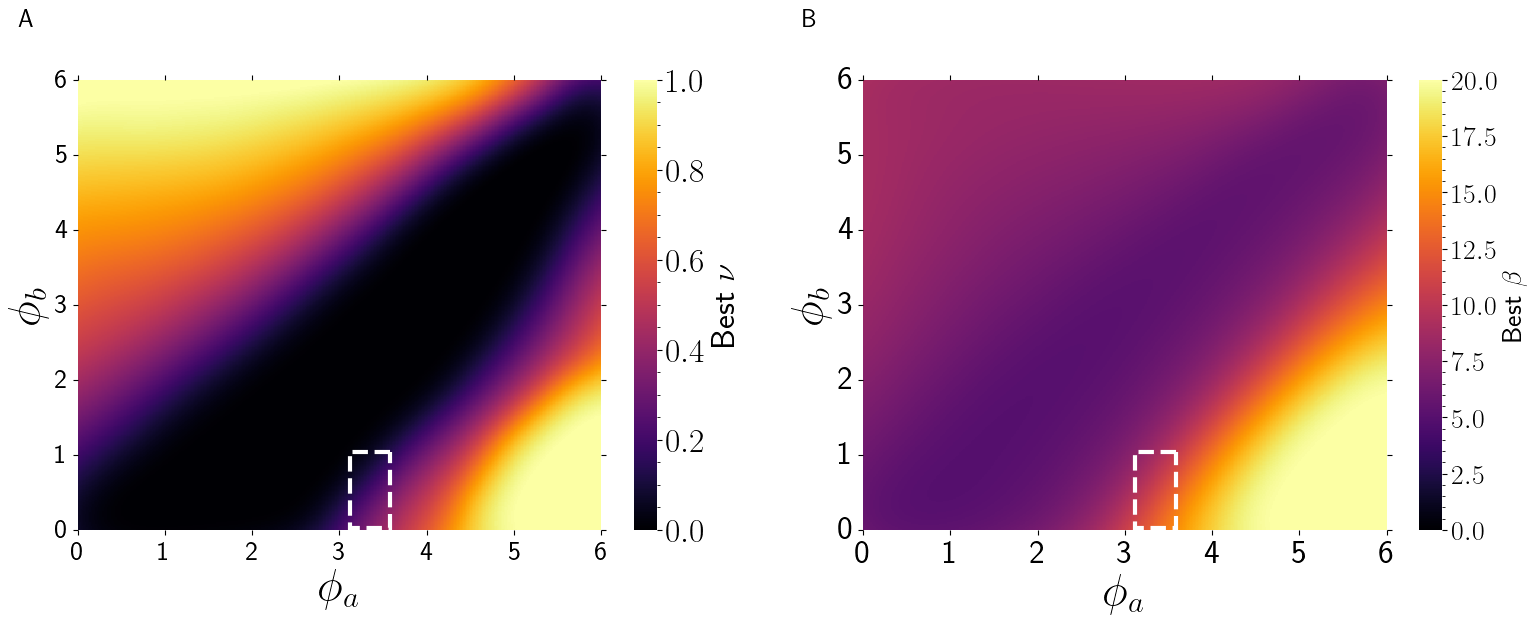

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf


fig = plt.figure(figsize=(8, 6))

#fig, (ax1,ax2) = plt.subplots(1, 2)


ax = fig.add_subplot(221)

plt.rcParams['text.usetex'] = True  #enable using LaTeX in matplotlib
plt.rcParams.update({'font.size': 24})

cm = plt.colormaps['inferno']

x, y, z, w = np.loadtxt('output.txt', unpack=True)
data1={'x':x, 'y':y, 'z':z,'w':w}
data = pd.DataFrame(data1)

data['x']=data['x']/6
data['y']=data['y']/6
data=data.pivot_table(index="y", columns="x", values="z", aggfunc='first')


x_min, x_max = np.amin(x), np.amax(x)
y_min, y_max = np.amin(y), np.amax(y)

# Make a grid with spacing 0.002.
grid_x, grid_y = np.mgrid[x_min:x_max:.1, y_min:y_max:.1]

rbfi = Rbf(x, y, z, smooth=20)

# Predict on the regular grid.
di = rbfi(grid_x, grid_y)

ax=sns.heatmap(di,cmap=cm,vmin=0, vmax=1, cbar_kws={'label': r'Best $\nu$ '}).invert_xaxis()
plt.tick_params(right=True, top=True, labelright=False, labeltop=False,rotation=0)
plt.rcParams["xtick.minor.visible"] =  True
plt.rcParams["ytick.minor.visible"] =  True


plt.xlabel(r' $\phi_a$',fontsize=32)
plt.ylabel(r' $\phi_b$',fontsize=32)

plt.xticks([360,300,240,180,120,60,0],['0','1','2','3','4','5','6'])
plt.yticks([360,300,240,180,120,60,0],['0','1','2','3','4','5','6'])
#plt.xticks([0,2,4,6,8,10,12],['0','1','2','3','4','5','6'])
#plt.xticks([0,2,4,6,8,10,12],['0','1','2','3','4','5','6'])
#plt.yticks([0,2,4,6,8,10,12],['0','1','2','3','4','5','6'])
#cb = sns.colorbar()
#cb.set_label(r'Best $\nu$ ', labelpad=-22, y=1.2,rotation=0)

#----Delimit the region for phi_a and phi_b with the error estimates

from matplotlib.patches import Rectangle
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((145, 298), 28, 60.2, linewidth=3, edgecolor='w', facecolor='none',linestyle = 'dashed'))

#plt.rcParams["xtick.minor.visible"] =  True
#plt.rcParams["ytick.minor.visible"] =  True
#axs[0].xaxis.set_ticks_position('both')
#axs[0].yaxis.set_ticks_position('both')




plt.title(r'A',x=-.1, y=1.1,fontsize=18)

#------
ax = fig.add_subplot(222)

plt.rcParams['text.usetex'] = True  #enable using LaTeX in matplotlib
plt.rcParams.update({'font.size': 20})

cm = plt.colormaps['inferno']


xB, yB, zB, wB = np.loadtxt('output.txt', unpack=True)
data1={'x':xB, 'y':yB, 'z':wB,'w':zB}
data = pd.DataFrame(data1)

data['x']=data['x']/6
data['y']=data['y']/6
data=data.pivot_table(index="y", columns="x", values="z", aggfunc='first')



x_min, x_max = np.amin(xB), np.amax(xB)
y_min, y_max = np.amin(yB), np.amax(yB)

# Make a grid with spacing 0.002.
grid_x, grid_y = np.mgrid[x_min:x_max:.1, y_min:y_max:.1]

rbfi = Rbf(xB, yB, wB, smooth=20)

# Predict on the regular grid.
di = rbfi(grid_x, grid_y)

ax=sns.heatmap(di,cmap=cm,vmin=0, vmax=20, cbar_kws={'label': r'Best $\beta$ '}).invert_xaxis()
#plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(10))
#plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(10))

plt.tick_params(right=True, top=True, labelright=False, labeltop=False,rotation=0)
plt.rcParams["xtick.minor.visible"] =  True
plt.rcParams["ytick.minor.visible"] =  True


plt.xlabel(r' $\phi_a$',fontsize=32)
plt.ylabel(r' $\phi_b$',fontsize=32)


plt.xticks([360,300,240,180,120,60,0],['0','1','2','3','4','5','6'])
plt.yticks([360,300,240,180,120,60,0],['0','1','2','3','4','5','6'])
#plt.xticks([0,2,4,6,8,10,12],['0','1','2','3','4','5','6'])
#plt.xticks([0,2,4,6,8,10,12],['0','1','2','3','4','5','6'])
#plt.yticks([0,2,4,6,8,10,12],['0','1','2','3','4','5','6'])
#cb = sns.colorbar()
#cb.set_label(r'Best $\nu$ ', labelpad=-22, y=1.2,rotation=0)


#----Delimit the region for phi_a and phi_b with the error estimates

from matplotlib.patches import Rectangle
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((145, 298), 28, 60.2, linewidth=3, edgecolor='w', facecolor='none',linestyle = 'dashed'))


#axs[0].xaxis.set_ticks_position('both')
#axs[0].yaxis.set_ticks_position('both')

plt.title(r'B',x=-.1, y=1.1,fontsize=18)




plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.9, 
                    top=1.9, 
                    wspace=.2,     #<---horizonta,inter-columns, space
                    hspace=0.4)    #<---vertical, inter-rows, space


plt.savefig('fig4.png', bbox_inches="tight",transparent=True)

plt.show()